# Practica 4: Regresion lineal y Cuadrados Minimos

In [30]:
import pandas as pd
import numpy as np
import seaborn.objects as so
import seaborn as sns
import matplotlib.pyplot as plt
from gapminder import gapminder
from sklearn import linear_model


1. (a) Implementar una funcion que calcule la pendiente y la ordenada al origen de la recta de regresion lineal con las formulas vistas en clase.

In [43]:
def coefs_rl(x: pd.Series|np.ndarray, y: pd.Series|np.ndarray) -> tuple[np.float64, np.float64]:
    x_mean = x.mean()
    y_mean = y.mean()
    beta_1 = np.sum((x - x_mean)*(y - y_mean), axis=0) / np.sum((x - x_mean)**2, axis=0)
    beta_0 = y_mean - beta_1 * x_mean
    return beta_1, beta_0

1. (b) Con el dataset `gapminder`, utilizar la función implementada en el item anterior para realizar una regresion lineal entre los años y la expectativa de vida en Argentina. Comparar los coefiientes con los obtenidos por `scikit-learn`

In [45]:
datos = gapminder[gapminder["country"] == "Argentina"]
print(coefs_rl(datos['year'], datos['lifeExp']))

(np.float64(0.2317083916083916), np.float64(-389.6063445221445))


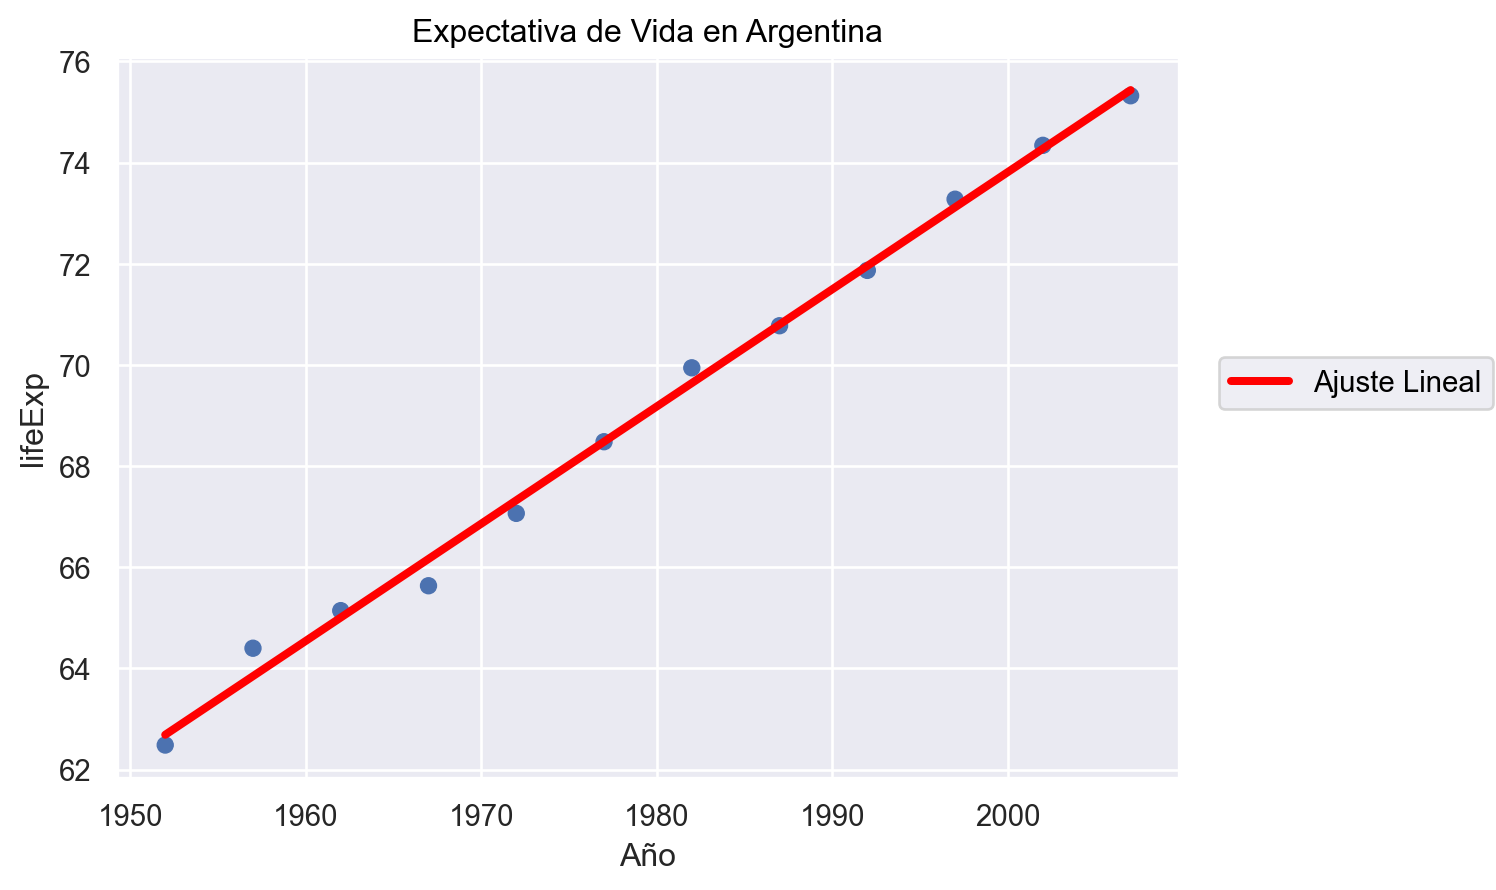

In [41]:
(
    so.Plot(datos, x = "year", y = "lifeExp")
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label="Ajuste Lineal")
    .label(title="Expectativa de Vida en Argentina", x = "Año")
)

In [52]:
modelo = linear_model.LinearRegression() # inicializamos un modelo de regresion lineal
modelo.fit(datos[['year']], datos[['lifeExp']]) # realizamos el ajuste
beta_1 = modelo.coef_[0][0]
beta_0 = modelo.intercept_[0]
print(beta_1, beta_0)

# modelo.fit le tengo que pasar un DataFrame
print(type(datos['year'])) # si uso esto, tira error de tipo
print(type(datos[['year']])) # debo usar este

0.23170839160839155 -389.6063445221444
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


2. En este ejercicio trabajaremos con el dataset de inmuebles(`ìnmuebles.csv` en la carpeta de datasets). El dataset contiene datos sobre inmebles que estan a la venta en cierta ciudad: su superficie en m², su precio en millones de pesos y la zona de la ciudad donde se encuentra. Recordar como cargar un dataset desde un `.csv` y visudalizar sus primeras filas:


In [54]:
datos = pd.read_csv("../../datasets/inmuebles.csv")
datos.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


2. (a) Realizar un grafico de dispersion (scatterplot) que muestre la relacion entre la superficie y el precio de cada inmueble

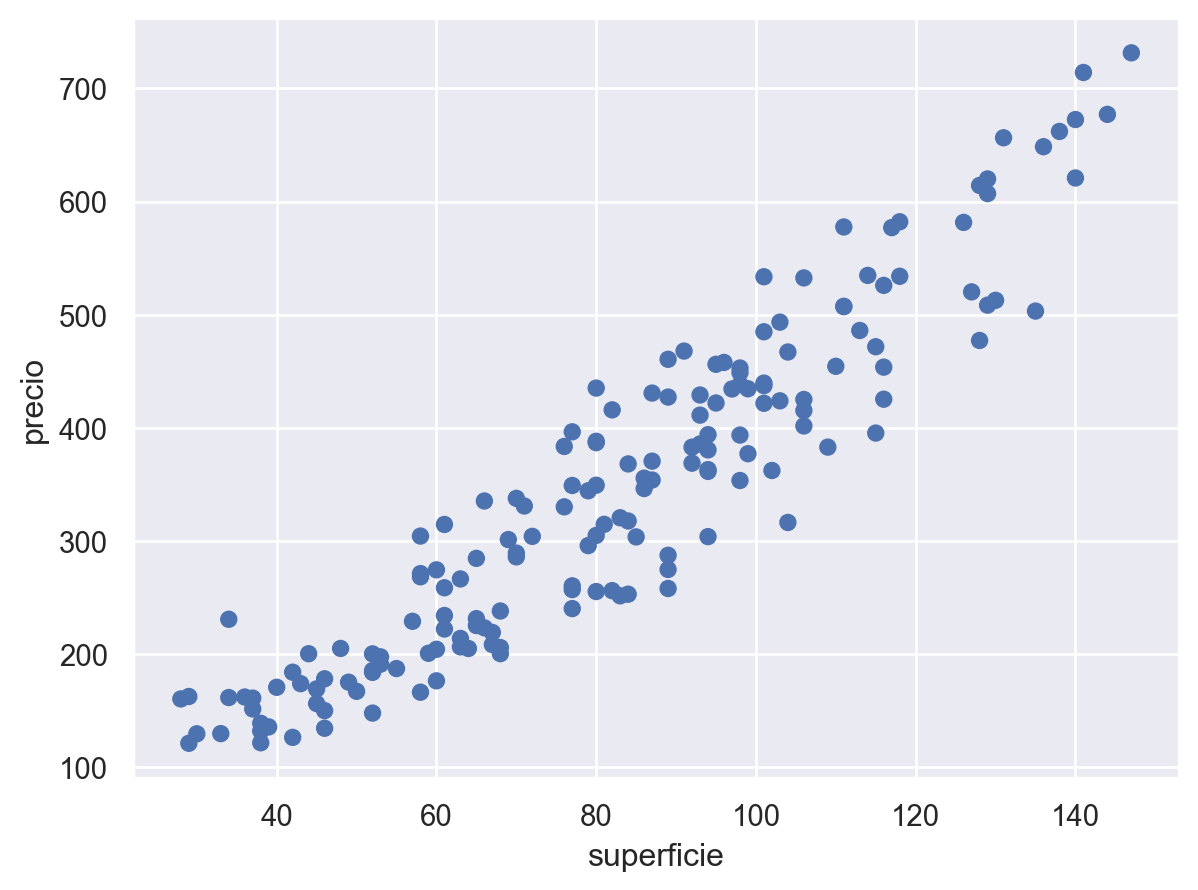

In [28]:
(
    so.Plot(datos, x = "superficie", y = "precio")
    .add(so.Dot())
)

2. (b) Realizar un grafico de la regresion lineal entre ambas variables. El grafico debe titularse "Datos Inmobiliarios" y la recta de Regresion Lineal debe tener una leyenda que diga "Regresion".

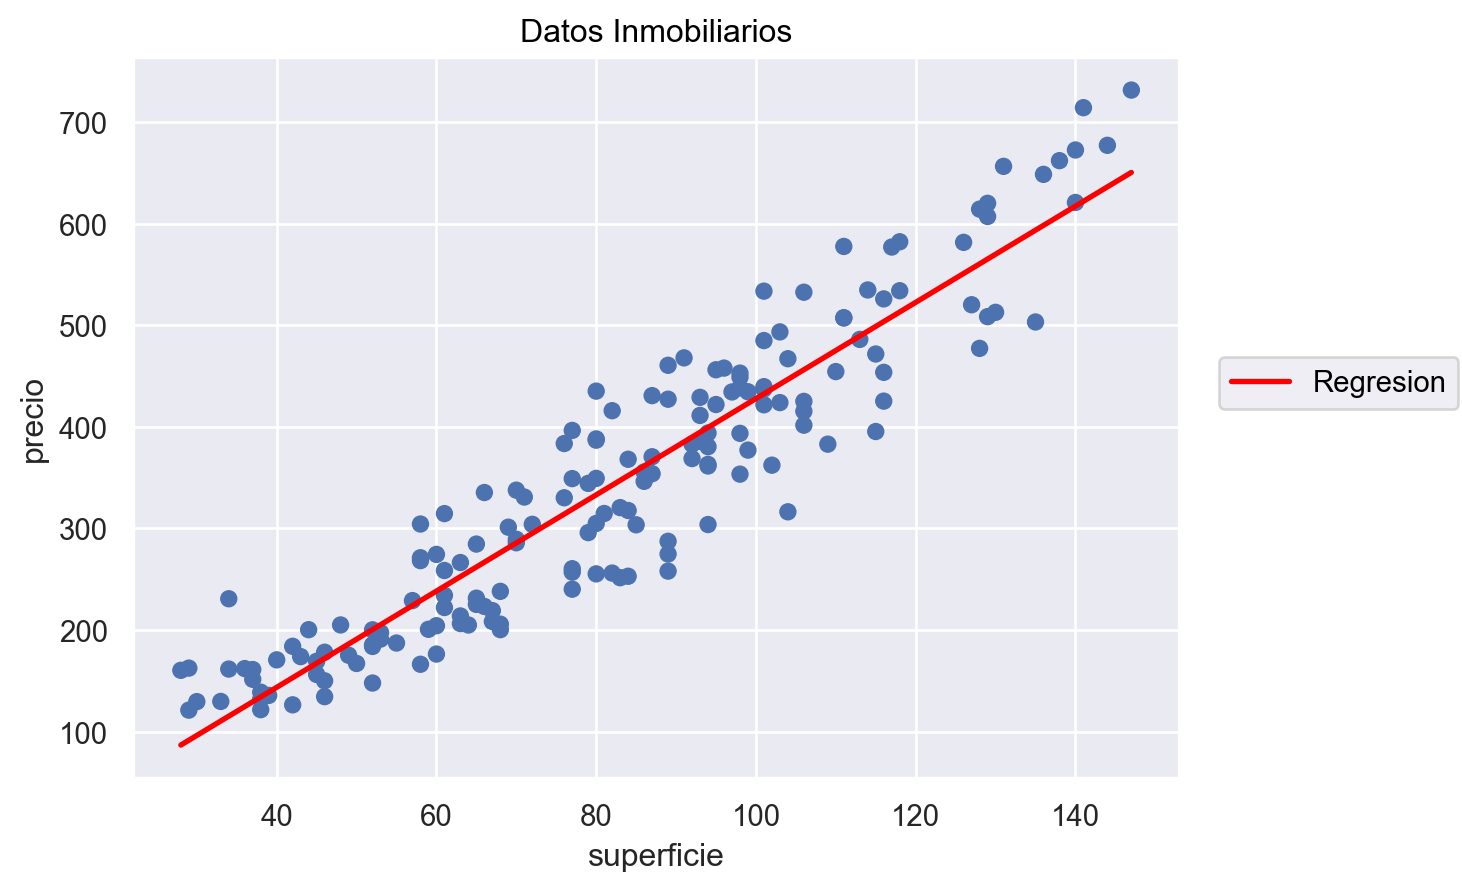

In [55]:
(
    so.Plot(datos, x = "superficie", y = "precio")
    .add(so.Dot())
    .add(so.Line(color="red", linewidth=2), so.PolyFit(1), label="Regresion")
    .label(title="Datos Inmobiliarios")
)

2. (c) Calcular los coeficientes de la recta que mejor ajusta a los datos. Segun el modelo, ¿qué podriamos interpretar sobre el costo del metro cuadrado en la ciudad?

In [ ]:
inmuebles = datos
modelo = linear_model.LinearRegression()
modelo.fit(inmuebles[['superficie']], inmuebles[['precio']])
print(modelo.coef_[0][0], modelo.intercept_[0])

4.73579682230239 -45.73153403092567


Podemos interpretar que como la ecuacion de la recta de ajuste lineal es $Y = 4.74 X + 45.73$, el precio en millones de pesos es aproximadamente 4,7 veces la superficie del terreno.

2. (d) Para medir que tan bien ajusta la recta a los datos, vamos a implementar dos funciones: una que calcule el error cuadratico medio (ECM) y otra que calcule el coeficiente de determinacion $R²$. 

In [ ]:
def ecm(x: pd.Series|np.ndarray, y: pd.Series|np.ndarray, pendiente: float, o_origen: float):
    
    return NotImplemented

def r_cuad(x, y, pendiente, o_origen):
    return NotImplemented